In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [3]:
df = pd.read_csv('/content/spotify_taylorswift.csv')
df.head()

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009
1,1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586
2,2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953
3,3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028
4,4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558


In [4]:
df.describe()

,Unnamed: 0,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,85.000000,236663.520468,61.228070,0.588632,0.321634,0.585977,0.002490,0.145927,-7.322111,0.065583,0.422984,124.141415
std,49.507575,40456.720158,11.904548,0.115067,0.334019,0.189577,0.018766,0.090314,2.878787,0.105956,0.192617,31.484487
min,0.000000,107133.000000,0.000000,0.292000,0.000191,0.118000,0.000000,0.033500,-17.932000,0.023100,0.049900,68.534000
25%,42.500000,211833.000000,58.000000,0.527000,0.030450,0.462000,0.000000,0.092950,-8.861500,0.029500,0.277500,96.052000
50%,85.000000,234000.000000,63.000000,0.593000,0.156000,0.606000,0.000002,0.115000,-6.698000,0.037200,0.416000,121.956000
75%,127.500000,254447.000000,67.000000,0.655500,0.674000,0.732000,0.000064,0.168000,-5.336500,0.055100,0.545000,146.040500
max,170.000000,403887.000000,82.000000,0.897000,0.971000,0.944000,0.179000,0.657000,-2.098000,0.912000,0.942000,207.476000


In [5]:
pd.options.display.float_format='{:.2f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)

<ipython-input-5-25367753acc6>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [6]:
df.info()
df.select_dtypes(include=object).nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        171 non-null    int64  
 1   name              171 non-null    object 
 2   album             171 non-null    object 
 3   artist            171 non-null    object 
 4   release_date      171 non-null    object 
 5   length            171 non-null    int64  
 6   popularity        171 non-null    int64  
 7   danceability      171 non-null    float64
 8   acousticness      171 non-null    float64
 9   energy            171 non-null    float64
 10  instrumentalness  171 non-null    float64
 11  liveness          171 non-null    float64
 12  loudness          171 non-null    float64
 13  speechiness       171 non-null    float64
 14  valence           171 non-null    float64
 15  tempo             171 non-null    float64
dtypes: float64(9), int64(3), object(4)
memory us

name            169
album           9  
artist          1  
release_date    9  
dtype: int64

In [7]:
df.select_dtypes(exclude=object).describe()

,Unnamed: 0,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
count,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00
mean,85.00,236663.52,61.23,0.59,0.32,0.59,0.00,0.15,-7.32,0.07,0.42,124.14
std,49.51,40456.72,11.90,0.12,0.33,0.19,0.02,0.09,2.88,0.11,0.19,31.48
min,0.00,107133.00,0.00,0.29,0.00,0.12,0.00,0.03,-17.93,0.02,0.05,68.53
25%,42.50,211833.00,58.00,0.53,0.03,0.46,0.00,0.09,-8.86,0.03,0.28,96.05
50%,85.00,234000.00,63.00,0.59,0.16,0.61,0.00,0.12,-6.70,0.04,0.42,121.96
75%,127.50,254447.00,67.00,0.66,0.67,0.73,0.00,0.17,-5.34,0.06,0.55,146.04
max,170.00,403887.00,82.00,0.90,0.97,0.94,0.18,0.66,-2.10,0.91,0.94,207.48


Limpieza de Datos

In [8]:
df = df.drop(['Unnamed: 0', 'name', 'artist', 'release_date', 'instrumentalness'], axis=1)
df

,album,length,popularity,danceability,acousticness,energy,liveness,loudness,speechiness,valence,tempo
0,Taylor Swift,232106,49,0.58,0.57,0.49,0.12,-6.46,0.03,0.42,76.01
1,Taylor Swift,173066,54,0.66,0.17,0.88,0.10,-2.10,0.03,0.82,105.59
2,Taylor Swift,203040,59,0.62,0.29,0.42,0.12,-6.94,0.02,0.29,99.95
3,Taylor Swift,199200,49,0.58,0.05,0.78,0.32,-2.88,0.03,0.43,115.03
4,Taylor Swift,239013,50,0.42,0.22,0.48,0.12,-5.77,0.03,0.26,175.56
...,...,...,...,...,...,...,...,...,...,...,...
166,Fearless (Taylor's Version),277591,74,0.66,0.16,0.82,0.07,-6.27,0.05,0.71,135.94
167,Fearless (Taylor's Version),244236,65,0.61,0.85,0.37,0.08,-8.82,0.03,0.13,106.01
168,Fearless (Taylor's Version),189495,67,0.59,0.23,0.61,0.09,-7.06,0.04,0.51,90.20
169,Fearless (Taylor's Version),208608,66,0.56,0.51,0.47,0.11,-11.55,0.05,0.41,101.93




We dropped Unnamed: 0, name, artist, release_date, and instrumentalness. We reduced the feature into 10 with 1 dependant variable.


In [9]:


popularity = df['popularity']
df = df.drop('popularity', axis=1)
df.insert(loc=len(df.columns), column='popularity', value=popularity)
df



,album,length,danceability,acousticness,energy,liveness,loudness,speechiness,valence,tempo,popularity
0,Taylor Swift,232106,0.58,0.57,0.49,0.12,-6.46,0.03,0.42,76.01,49
1,Taylor Swift,173066,0.66,0.17,0.88,0.10,-2.10,0.03,0.82,105.59,54
2,Taylor Swift,203040,0.62,0.29,0.42,0.12,-6.94,0.02,0.29,99.95,59
3,Taylor Swift,199200,0.58,0.05,0.78,0.32,-2.88,0.03,0.43,115.03,49
4,Taylor Swift,239013,0.42,0.22,0.48,0.12,-5.77,0.03,0.26,175.56,50
...,...,...,...,...,...,...,...,...,...,...,...
166,Fearless (Taylor's Version),277591,0.66,0.16,0.82,0.07,-6.27,0.05,0.71,135.94,74
167,Fearless (Taylor's Version),244236,0.61,0.85,0.37,0.08,-8.82,0.03,0.13,106.01,65
168,Fearless (Taylor's Version),189495,0.59,0.23,0.61,0.09,-7.06,0.04,0.51,90.20,67
169,Fearless (Taylor's Version),208608,0.56,0.51,0.47,0.11,-11.55,0.05,0.41,101.93,66


Análisis de Datos

Text(0.5, 1.0, 'Distribución de Popularidad')

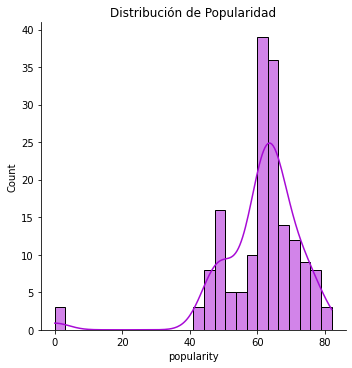

In [10]:
sns.displot(x='popularity', data=df, kde=True, color='#a70ad5')
plt.title('Distribución de Popularidad')

In [12]:
df = df.drop(df.loc[df['popularity'] <=20].index)
df = df.reset_index()
df = df.drop('index', axis=1)
df

,album,length,danceability,acousticness,energy,liveness,loudness,speechiness,valence,tempo,popularity
0,Taylor Swift,232106,0.58,0.57,0.49,0.12,-6.46,0.03,0.42,76.01,49
1,Taylor Swift,173066,0.66,0.17,0.88,0.10,-2.10,0.03,0.82,105.59,54
2,Taylor Swift,203040,0.62,0.29,0.42,0.12,-6.94,0.02,0.29,99.95,59
3,Taylor Swift,199200,0.58,0.05,0.78,0.32,-2.88,0.03,0.43,115.03,49
4,Taylor Swift,239013,0.42,0.22,0.48,0.12,-5.77,0.03,0.26,175.56,50
...,...,...,...,...,...,...,...,...,...,...,...
163,Fearless (Taylor's Version),277591,0.66,0.16,0.82,0.07,-6.27,0.05,0.71,135.94,74
164,Fearless (Taylor's Version),244236,0.61,0.85,0.37,0.08,-8.82,0.03,0.13,106.01,65
165,Fearless (Taylor's Version),189495,0.59,0.23,0.61,0.09,-7.06,0.04,0.51,90.20,67
166,Fearless (Taylor's Version),208608,0.56,0.51,0.47,0.11,-11.55,0.05,0.41,101.93,66


Text(0.5, 1.0, 'Distribución de Popularidad\n(Después del borrado)')

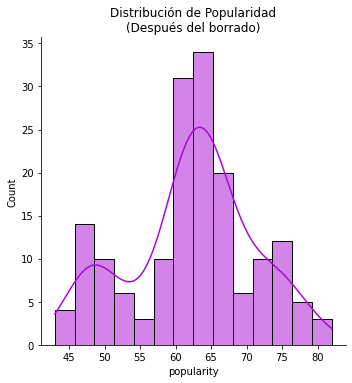

In [14]:
sns.displot(x='popularity', data=df, kde=True, color='#a70ad5')
plt.title('Distribución de Popularidad\n(Después del borrado)')

In [15]:
from scipy.stats import skew
print(skew(df['popularity'], bias=False))

-0.24360906678672503


Album vs. Análisis de Popularidad

Text(0.5, 1.0, 'Album vs Popularidad')

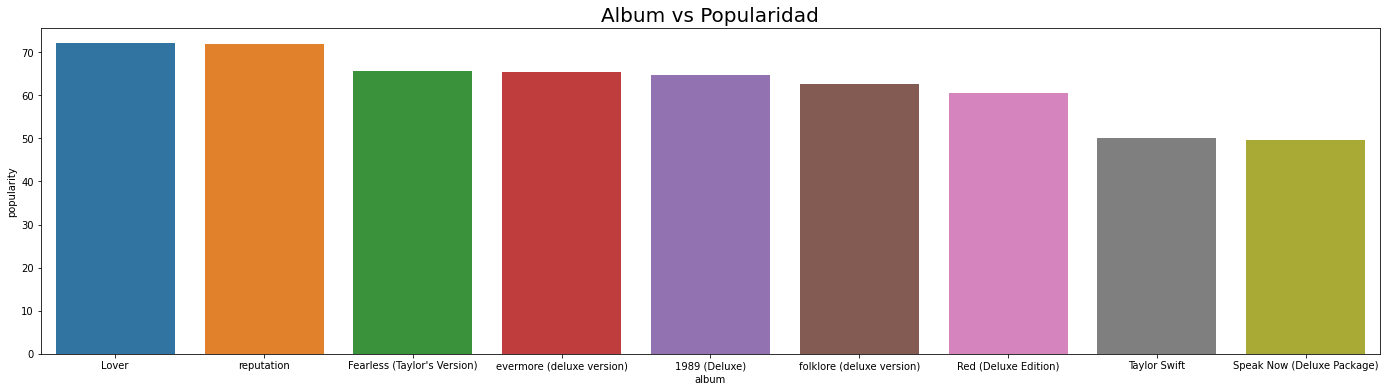

In [16]:
#creating dummy dataset to sort the data. It is to see which album is having most popularity.
apa = df.groupby('album').mean().sort_values(['popularity'],ascending=False)
apa = apa.reset_index()

plt.figure(figsize=(24, 6))
sns.barplot(x='album', y='popularity', data=apa)
plt.title('Album vs Popularidad', fontsize=20)

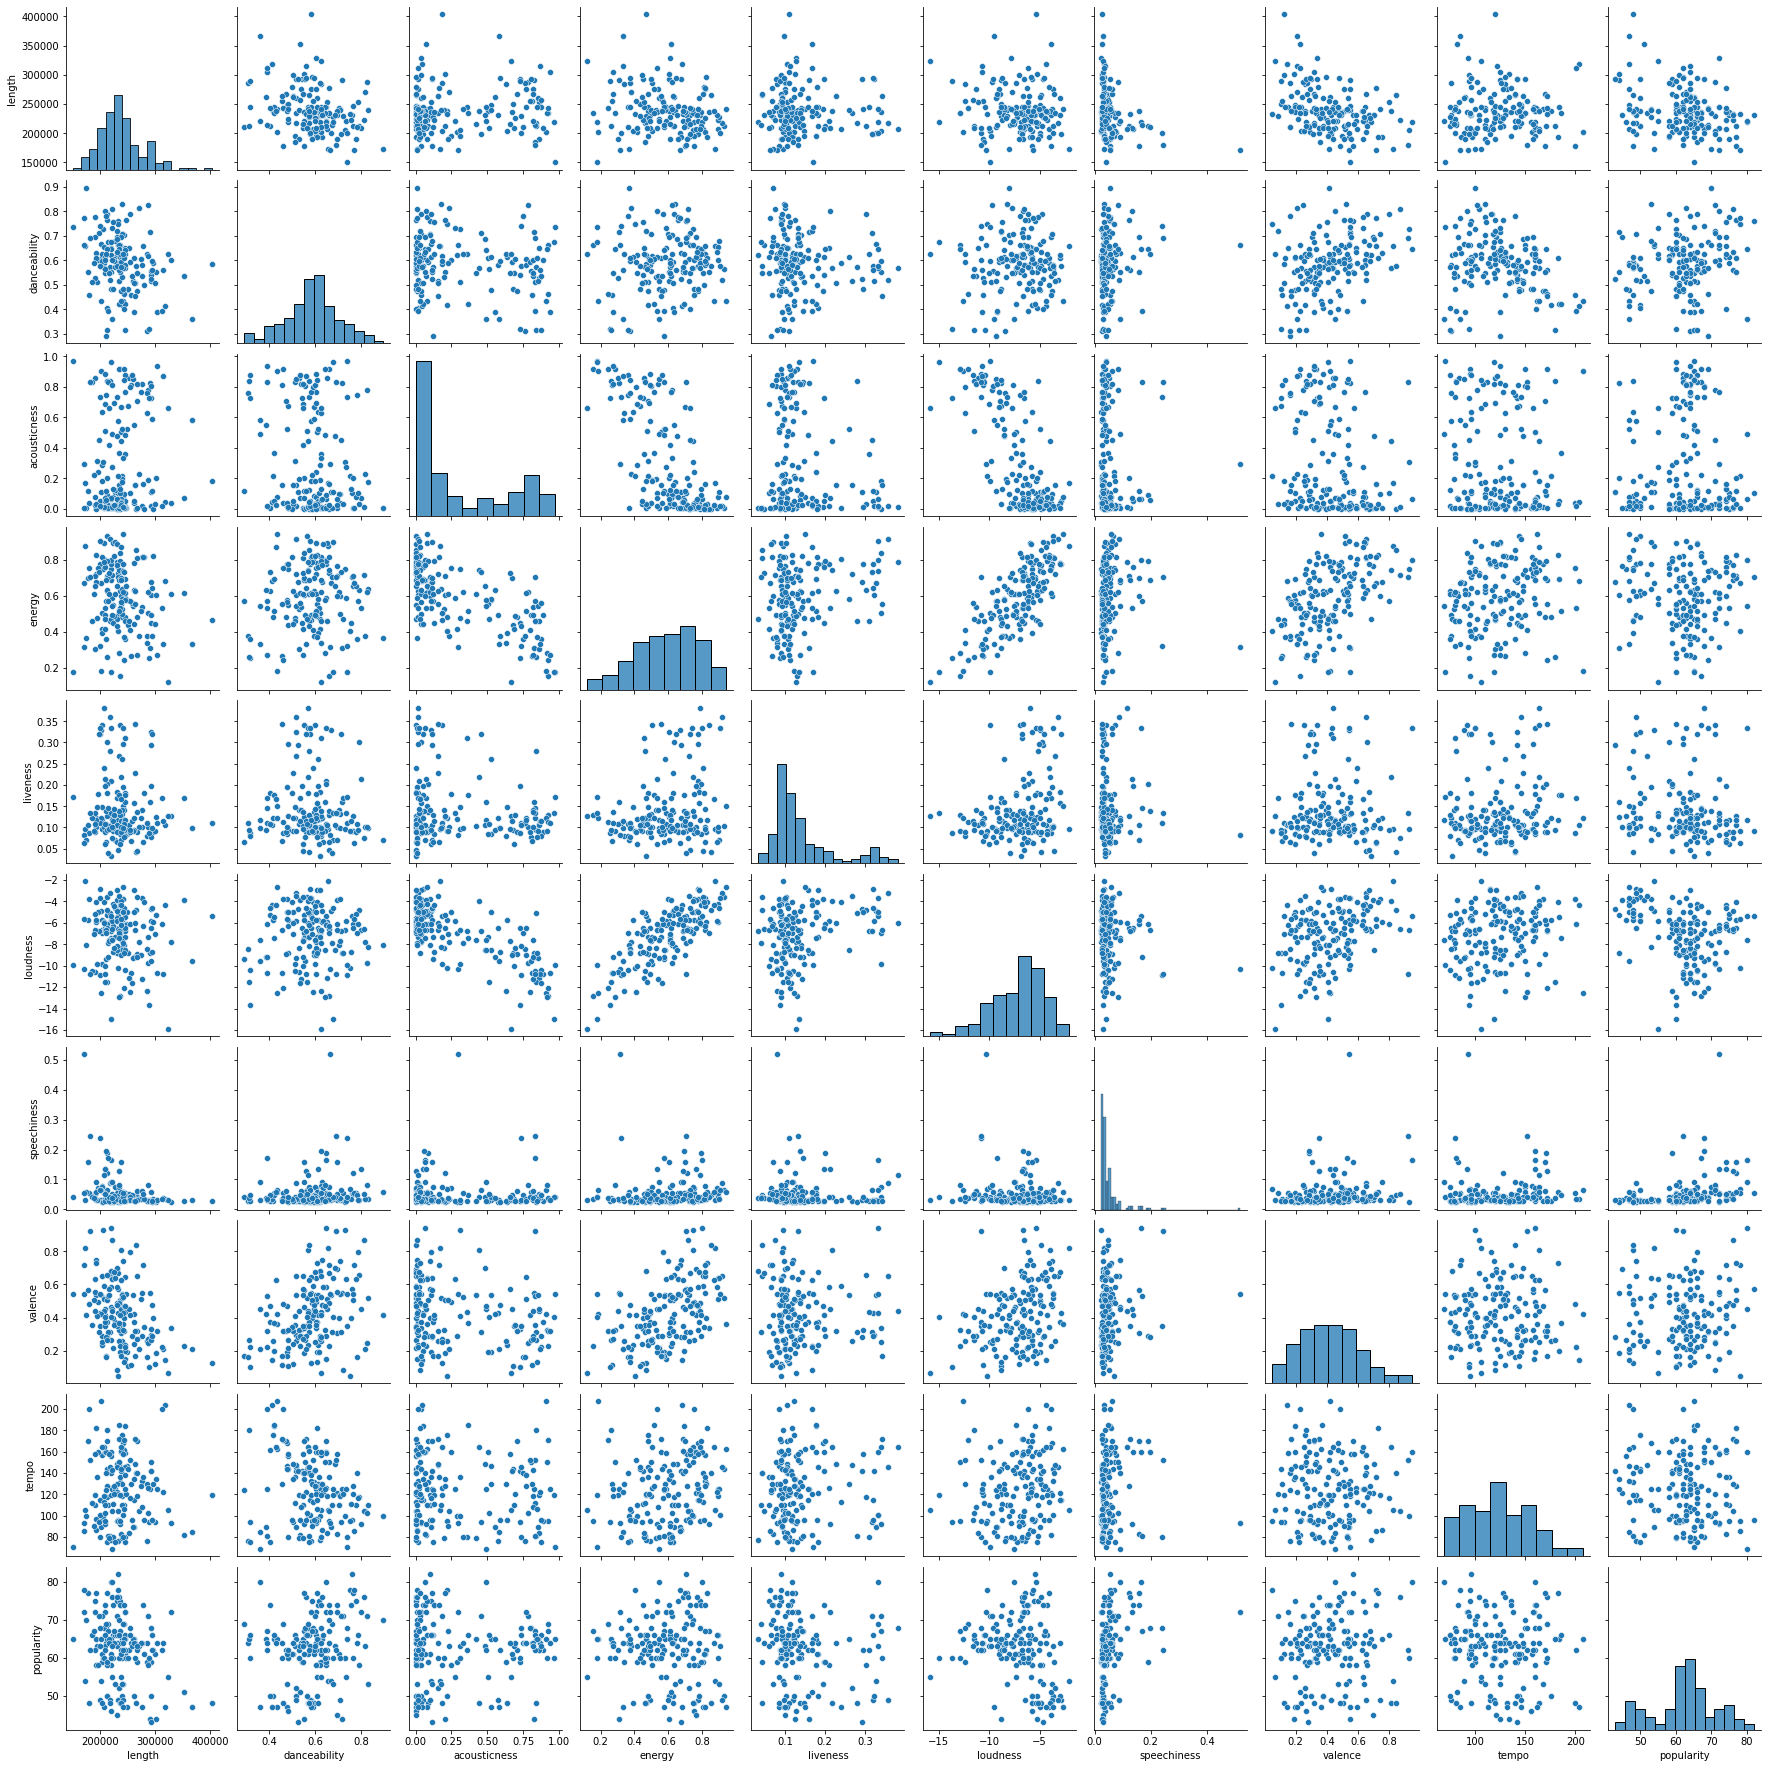

In [17]:
sns.pairplot(df)

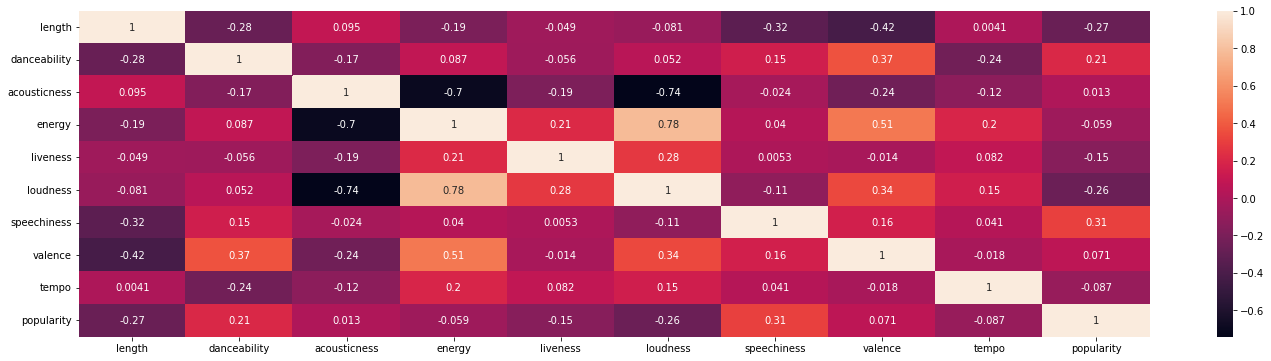

In [18]:
corr = df.corr()
plt.figure(figsize=(24, 6))
sns.heatmap(corr, annot=True)

Text(0.5, 1.0, 'Acustica vs Energía')

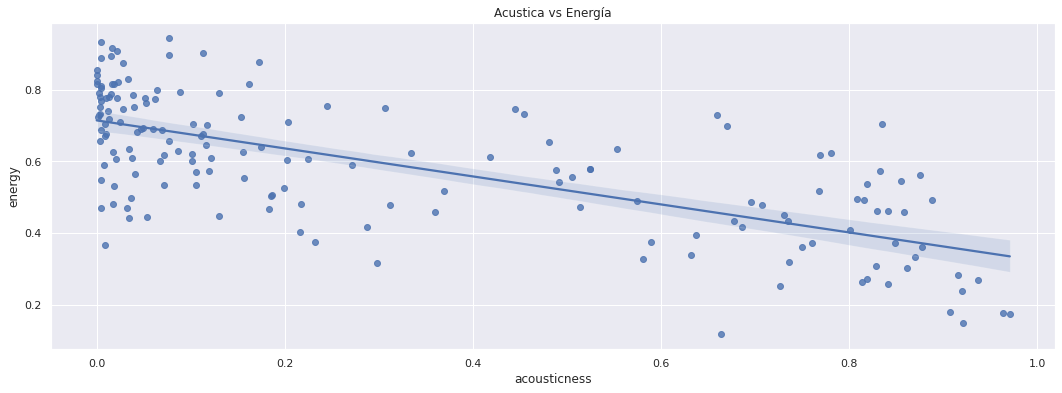

In [19]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(18, 6))
sns.regplot(x='acousticness', y='energy', data=df)
plt.title('Acustica vs Energía')

Text(0.5, 1.0, 'Acustica vs Volumen')

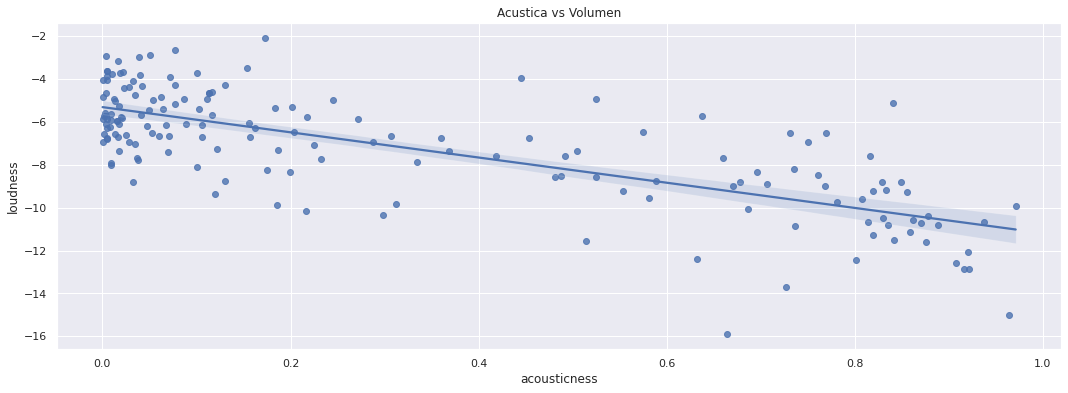

In [20]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(18, 6))
sns.regplot(x='acousticness', y='loudness', data=df)
plt.title('Acustica vs Volumen')

Text(0.5, 1.0, 'Energía vs Volumen')

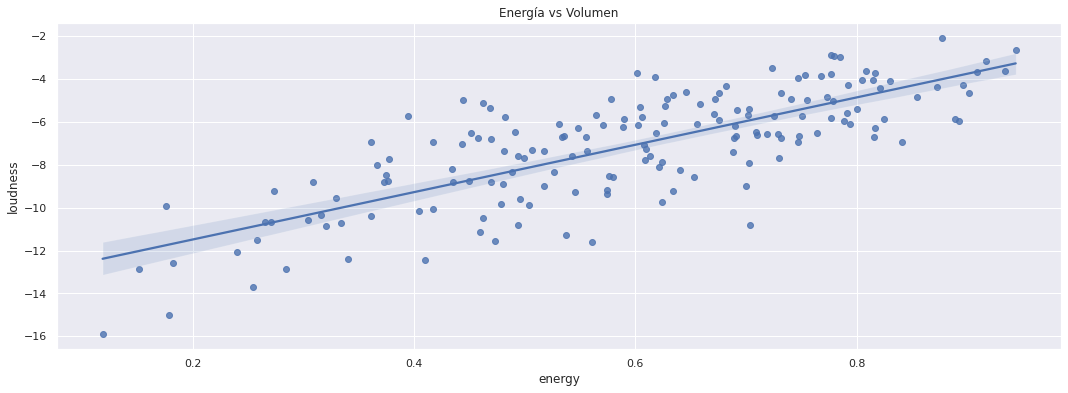

In [21]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(18, 6))
sns.regplot(x='energy', y='loudness', data=df)
plt.title('Energía vs Volumen')

# Modelado

### Borramos datos no relevantes

In [22]:
df = df.drop('album', axis=1)
df

,length,danceability,acousticness,energy,liveness,loudness,speechiness,valence,tempo,popularity
0,232106,0.58,0.57,0.49,0.12,-6.46,0.03,0.42,76.01,49
1,173066,0.66,0.17,0.88,0.10,-2.10,0.03,0.82,105.59,54
2,203040,0.62,0.29,0.42,0.12,-6.94,0.02,0.29,99.95,59
3,199200,0.58,0.05,0.78,0.32,-2.88,0.03,0.43,115.03,49
4,239013,0.42,0.22,0.48,0.12,-5.77,0.03,0.26,175.56,50
...,...,...,...,...,...,...,...,...,...,...
163,277591,0.66,0.16,0.82,0.07,-6.27,0.05,0.71,135.94,74
164,244236,0.61,0.85,0.37,0.08,-8.82,0.03,0.13,106.01,65
165,189495,0.59,0.23,0.61,0.09,-7.06,0.04,0.51,90.20,67
166,208608,0.56,0.51,0.47,0.11,-11.55,0.05,0.41,101.93,66


In [23]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:,-1].values

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=27)

Creando modelo de Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=27)
regressor.fit(x_train, y_train)


RandomForestRegressor(random_state=27)

Test de la predicción

In [26]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=0)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[60. 64.]
 [57. 55.]
 [68. 58.]
 [66. 66.]
 [68. 68.]
 [66. 61.]
 [66. 65.]
 [61. 63.]
 [59. 65.]
 [65. 66.]
 [61. 47.]
 [67. 66.]
 [65. 63.]
 [73. 78.]
 [69. 69.]
 [73. 72.]
 [67. 71.]
 [59. 59.]
 [65. 65.]
 [60. 55.]
 [69. 72.]
 [61. 64.]
 [68. 48.]
 [59. 64.]
 [56. 58.]
 [68. 74.]
 [65. 66.]
 [57. 50.]
 [66. 60.]
 [52. 49.]
 [69. 67.]
 [54. 50.]
 [59. 47.]
 [66. 60.]]


In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4206901039882722